In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

#必要なライブラリを import 
from sklearn import datasets
import numpy as np

# 訓練用データの取得
data_train = np.loadtxt('data_train.csv', delimiter=',', encoding='utf-8_sig')
y_train = data_train[:,0].astype(int)
X_train = data_train[:,1:3]

# テスト用データの取得
data_test = np.loadtxt('data_test.csv', delimiter=',', encoding='utf-8_sig') 
y_test = data_test[:,0].astype(int)
X_test = data_test[:,1:3]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
from sklearn.svm import SVC
# 線形SVMのインスタンスを生成
model = SVC(kernel='rbf', gamma=1/2 , C=1.0,class_weight='balanced', random_state=0)

# モデルの学習。fit関数で行う。
model.fit(X_train_std, y_train)

SVC(class_weight='balanced', gamma=0.5, random_state=0)

In [4]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

# テストデータに対する精度
pred_test = model.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)

トレーニングデータに対する正解率： 1.00
テストデータに対する正解率： 1.00


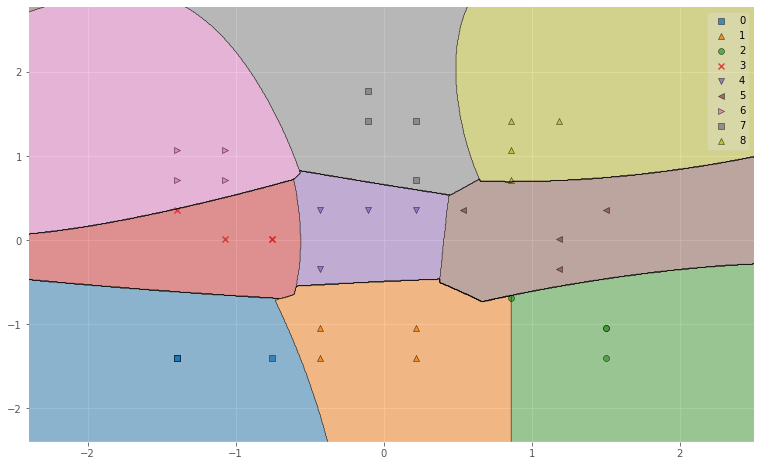

In [5]:
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()

In [7]:
print(model.intercept_)

[-0.02192692  0.03017514  0.01335534  0.01212132 -0.08310355  0.03804995
 -0.02036383  0.02168455  0.          0.00160307 -0.04533569 -0.10814713
  0.04339884  0.00536631  0.03322663 -0.04788576 -0.11360173 -0.1009129
 -0.01242383 -0.0564717  -0.0172801  -0.07172839 -0.04613072  0.0991355
  0.01037106  0.04810712  0.00766627  0.12473489 -0.02742973  0.02073224
  0.1081958   0.07410369  0.03545898 -0.08909859  0.00628644  0.12609364]


In [16]:
print(len(model.dual_coef_))
print(model.dual_coef_)

8
[[ 1.          0.09605366  1.         -1.         -1.         -0.09605366
  -0.         -0.59434145 -0.53231736 -0.36642172 -0.99442958 -0.28160185
  -1.         -0.19610106 -0.38575904 -0.47148681 -0.22859861 -0.56440441
  -0.0445259  -0.50315485 -0.64075489 -0.49819726 -0.66932405 -0.
  -0.         -0.50897119 -0.57677534]
 [ 0.74811226  0.          0.37854655  0.91150862  0.          0.91600768
  -0.         -0.90799837 -0.91951794 -1.         -0.84716705 -0.
  -1.         -0.11596224 -0.90033548 -1.         -0.         -0.77710993
  -0.04329721 -0.1858838  -1.         -0.32471846 -1.         -0.
  -0.         -0.3410125  -0.80205605]
 [ 1.          0.          0.64245314  0.          1.          0.84716705
   0.          0.45758534  0.64909336 -0.         -0.63351083 -0.47316787
  -0.5843099  -0.         -0.72093321 -1.         -0.72651082 -0.27348918
  -0.50124576 -0.         -0.54623587 -0.41782109 -0.72681956 -0.
  -0.         -0.35943709 -0.74917179]
 [ 1.          0.        

In [11]:
print(model.intercept_)

[ 1.          0.09605366  1.         -1.         -1.         -0.09605366
 -0.         -0.59434145 -0.53231736 -0.36642172 -0.99442958 -0.28160185
 -1.         -0.19610106 -0.38575904 -0.47148681 -0.22859861 -0.56440441
 -0.0445259  -0.50315485 -0.64075489 -0.49819726 -0.66932405 -0.
 -0.         -0.50897119 -0.57677534]
